# Feature Engineering and Model Building

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline

In [2]:
new_df = pd.read_csv('Clean.csv')
new_df.head()

,Cement,Slag,Ash,Water,Superplastic,Coarse_agg,Fine_agg,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.00,28.0,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.00,28.0,61.89
2,332.5,142.5,0.0,203.5,0.0,932.0,664.07,100.0,40.27
3,332.5,142.5,0.0,203.5,0.0,932.0,664.07,100.0,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.50,100.0,44.30


Correlation between variables

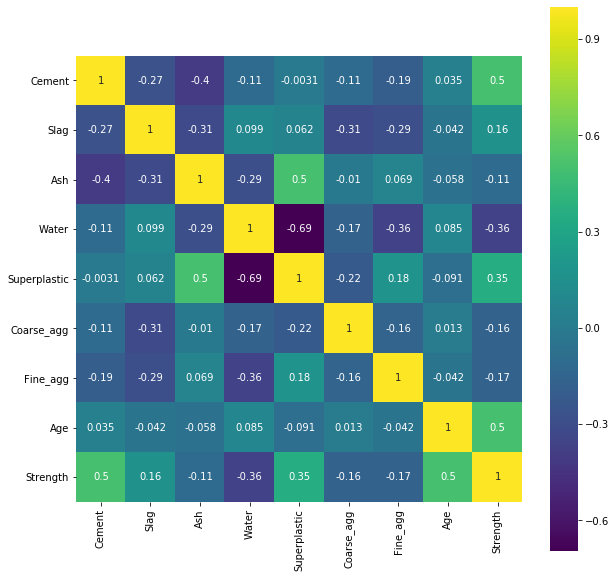

In [3]:
plt.figure(figsize = (10,10))
sns.heatmap(new_df.corr(), vmax = 1, square = True, annot = True, cmap = 'viridis')
plt.show()

Now am going to divide the data into dependent and independent  variables inorder to prevent the 'Data leakage'.

Here 'Strength' is the dependent variabale i.e, y and all other features are independent i.e, X.

In [4]:
X = new_df.drop('Strength', axis = 1) #Independent
y = new_df["Strength"] #dependent(target)

Scaling using Z score

In [5]:
from scipy.stats import zscore

Xscaled = X.apply(zscore)
Xscaled_df = pd.DataFrame(Xscaled, columns = new_df.columns)

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics


# Random Forest Regressor

In [7]:
from sklearn.ensemble import RandomForestRegressor 

Train-Test split the data

In [8]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(Xscaled,y, test_size = 0.3, random_state = 1)

In [9]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

C:\Users\Md Khalid Siddique\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [10]:
y_pred = model.predict(X_test)

In [11]:
#Performance of model on train data
model.score(X_train, y_train)

0.9766192011911906

In [12]:
model.score(X_test, y_test)

0.8765900456418061

In [13]:
#mean squared error
metrics.mean_squared_error(y_test, y_pred)

32.34663746719975

# Gradient Boosting Regressor

In [14]:
from sklearn.ensemble import GradientBoostingRegressor

In [15]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [16]:
y_pred = model.predict(X_test)

In [17]:
model.score(X_train, y_train)

0.9486627746115355

In [18]:
model.score(X_test, y_test)

0.875154730861988

In [19]:
#mean squared error
metrics.mean_squared_error(y_test, y_pred)

32.72284380384044

# XGBoost Regressor

In [20]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

xgr = XGBRegressor()

xgr.fit(X_train, y_train)

[20:28:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Md Khalid Siddique\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [21]:
y_pred = xgr.predict(X_test)

In [22]:
xgr.score(X_train,y_train)

0.9445650327030156

In [23]:
xgr.score(X_test,y_test)

0.8777473268801655

In [24]:
#mean squared error
metrics.mean_squared_error(y_test, y_pred)

32.04330572334262

#  Hyperparameter tuning for RandomForestRegressor

I already used this algorithm, now am doing the same by performing "Hyperparameter tuning".

In [25]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib 

C:\Users\Md Khalid Siddique\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [26]:
#Declare data preprocessing steps
pipeline = make_pipeline(preprocessing.StandardScaler(), 
                         RandomForestRegressor(n_estimators=100))

In [27]:
#Declare hyperparameters to tune
hyperparameters = { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
                  'randomforestregressor__max_depth': [None, 5, 3, 1]}

In [28]:
#Tune model using cross-validation pipeline
clf = GridSearchCV(pipeline, hyperparameters, cv=10)
clf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('randomforestregressor',
                                        RandomForestRegressor(bootstrap=True,
                                                              criterion='mse',
                                                              max_depth=None,
                                                              max_features='auto',
                                                              max_leaf_nodes=None,
                                                              min_impurity_decrease=0.0,
                                                              min_impurity_split

In [29]:
#Perfomance on train data
clf.score(X_train, y_train)

0.9834389936325668

In [30]:
#MSE
pred = clf.predict(X_test)
mean_squared_error(y_test, pred)

28.596664229845477

In [31]:
#perfomance on testv data
r2_score(y_test, pred) 

0.8908970667822759

In [32]:
#import json
#columns = {
    #'data_columns' : [col.lower() for col in X.columns]
#}
#with open("columns.json",'w') as f:
    #f.write(json.dumps(columns))

In [33]:
#from flask import request, Flask, jsonify
#app=Flask(__name__)

In [34]:
#@app.route('/hello')
#def hello():
    #return "Hi"

In [35]:
#if __name__ == "__main__":
    #print("Starting python flask server for determing compressive strength of concrete")
    #app.run()

# ExtraTreesRegressor 

In [36]:
from sklearn.ensemble import ExtraTreesRegressor

In [37]:
reg = ExtraTreesRegressor(n_estimators=100, random_state=0).fit(X_train, y_train)

In [38]:
reg.score(X_train, y_train)

0.9958197127574285

In [39]:
reg.score(X_test, y_test)

0.8887590397566237

In [40]:
pred = reg.predict(X_test)
metrics.mean_squared_error(y_test, pred)

29.15705650495412

# Tuning ExtraTreesRegressor

In [41]:
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib 

In [42]:
#Declare data preprocessing steps
pipeline = make_pipeline(preprocessing.StandardScaler(), 
                         ExtraTreesRegressor(n_estimators=100))

In [43]:
#Declare hyperparameters to tune
hyperparameters = { 'extratreesregressor__max_features' : ['auto', 'sqrt', 'log2'],
                  'extratreesregressor__max_depth': [None, 5, 3, 1]}

In [44]:
#Tune model using cross-validation pipeline
cle= GridSearchCV(pipeline, hyperparameters, cv=10)
cle.fit(X_train, y_train)

C:\Users\Md Khalid Siddique\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('extratreesregressor',
                                        ExtraTreesRegressor(bootstrap=False,
                                                            criterion='mse',
                                                            max_depth=None,
                                                            max_features='auto',
                                                            max_leaf_nodes=None,
                                                            min_impurity_decrease=0.0,
                                                            min_impurity_split=None,
        

In [45]:
#Perfomance on train data
cle.score(X_train, y_train)

0.9958197127574285

In [46]:
pred = cle.predict(X_test)
metrics.mean_squared_error(y_test, pred)

28.43643451643471

In [47]:
cle.score(X_test, y_test)

0.8915083804509347

# Flask API

In [55]:
import pickle
with open("Concrete_compressive_strength.pkl", 'wb') as f:
    pickle.dump(cle,f)

In [60]:
from flask import Flask,request,jsonify,render_template
app=Flask(__name__)
model=pickle.load(open('Concrete_compressive_strength.pkl','rb'))
debug=True
@app.route('/')
def home():
    #return render_template('index')
    return render_template('index.html')
#@app.route('/predict',methods=['POST','GET'])
@app.route('/predict',methods=['POST'])
def predict():
    #print(request.form)
    int_features=[int(x) for x in request.form.values()]
    final_features=[np.array(int_features)]
    prediction=model.predict(final_features)
    
    output=prediction[0]
    
    #return render_template('index',prediction_text='Marketimg Team Needs To contact this person by this strategy {}'.format(output))
    return render_template('index.html',prediction_text='Cement has good compressive strength {}'.format(output))

if __name__=='__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [25/May/2020 20:59:59] "GET / HTTP/1.1" 200 -
[2020-05-25 21:00:16,199] ERROR in app: Exception on /predict [POST]
Traceback (most recent call last):
  File "C:\Users\Md Khalid Siddique\Anaconda3\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\Md Khalid Siddique\Anaconda3\lib\site-packages\flask\app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\Md Khalid Siddique\Anaconda3\lib\site-packages\flask\app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\Md Khalid Siddique\Anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\Md Khalid Siddique\Anaconda3\lib\site-packages\flask\app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\Md Khalid Siddique\Anaconda3\lib\site-pa